## Frame the Problem and Big Picture
**Client Background:**
- Our client, FinSight Analytics, is a financial risk assessment consultancy that provides services to major investment firms, banks, and private equity companies across North America. They've approached Team Gort to develop a more effective bankruptcy prediction model that their analysts can use to assess investment and lending risks.

**1. Define the objective in business terms:**
- The objective is to develop a bankruptcy prediction model that reduces financial risk exposure for FinSight Analytics' clients by identifying companies at high risk of bankruptcy before it occurs. This will enable clients to protect their investments, adjust lending terms, or avoid high-risk engagements altogether, ultimately preventing significant financial losses.

**2. How will your solution be used?**
- This model will be used by financial institutions (banks, investment firms, and creditors) to assess the bankruptcy risk of companies they're considering investing in or extending credit to. It will serve as an early warning system, allowing these stakeholders to make more informed decisions, adjust lending terms based on risk profiles, implement early intervention strategies, and optimize their portfolio management.

**3. What are the current solutions/workarounds (if any)?**
- Currently, financial institutions rely on traditional credit scoring models and manual analysis by financial analysts. These approaches often fail to detect early warning signs of bankruptcy and tend to over-rely on limited metrics like payment history and debt ratios while overlooking other critical financial indicators.

**4. How should you frame this problem?**
- This is a supervised binary classification problem since we are trying to predict whether a company will go bankrupt (1) or not (0) based on historical financial data. This would be a batch learning solution that gets periodically updated as new financial data becomes available, though predictions would be generated whenever a new company needs to be evaluated.

**5. How should performance be measured? Is the performance measure aligned with the business objective?**
- Our objective is to be able to predict at least 75% of the companies that will go bankrupt while maintaining a false positive rate below 15%. This aligns with our business objective since missing a bankruptcy prediction can result in significant financial losses, while incorrectly flagging healthy companies can lead to missed business opportunities.

- **False negatives (missing bankruptcies)**: Each missed bankruptcy prediction could cost clients millions in unrecoverable investments.

**6. What would be the minimum performance needed to reach the business objective?**
- The minimum performance needed would be the ability to correctly identify at least 75% of companies that will go bankrupt, with a false positive rate below 15%, and provide predictions at least 12 months before bankruptcy occurs.

**7. What are comparable problems? Can you reuse experience or tools?**
- This problem is comparable to other financial risk assessment problems such as credit default prediction and loan delinquency prediction. We can leverage our experience with classification algorithms like Random Forest, Gradient Boosting, and logistic regression, which have proven effective in similar financial prediction tasks. We can also use techniques from previous projects dealing with imbalanced datasets. Other past machine learning problems we have tackled such as the airline project can contribute to our knowledge of how to navigate a classification problem.

**8. Is human expertise available?**
- No we currently don't have any human expertise at the moment to assist us with this problem but we have been looking for online at people who have worked in this field to seek guidance from things they have shared publicly or if we can eventually get in contact.

**9. How would you solve the problem manually?**
- To solve this problem manually, we would need to analyze the historical financial data of companies that went bankrupt and those that remained solvent. We would look for patterns in financial ratios, identify negative trends in profitability and liquidity, examine cash flow patterns, assess debt structure, and combine these factors to make a risk assessment. We would also need to consider industry-specific benchmarks since financial ratios can vary significantly across different sectors.

**10. List the assumptions you (or others) have made so far. Verify assumptions if possible.**
- We have made the assumption that financial ratios and indicators from company reports are strong predictors of future bankruptcy. We also assume that the relationship between these indicators and bankruptcy risk remains relatively stable over time. Another assumption is that the provided dataset contains sufficient examples of both bankrupt and non-bankrupt companies to train an effective model. We will need to verify these assumptions during our exploratory data analysis phase.


## Get the Data

**1. List the data you need and how much you need**
- Company Bankruptcy Data 

**2. Find and document where you can get that data**
- The data is freely available on Kaggle: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction?resource=download

**3. Get access authorizations**
- You must make a kaggle account to be able to download the data

**4. Create a workspace (with enough storage space)**
- This notebook

**5. Get the data**
- Download from the link

**6. Convert the data to a format you can easily manipulate (without changing the data itself)**
- The data is all in a csv file that is easily manipulatable 

**7. Ensure sensitive information is deleted or protected (e.g. anonymized)**
- There is no sensitive data that is stored inside the csv

**8. Check the size and type of data (time series, geographical, ...)**
- Need to document

**9. Sample a test set, put it aside, and never look at it (no data snooping!)**
- Done

In [1]:
# Imports
import numpy as np
import os
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [2]:
data = np.loadtxt('Bankruptcy.csv', delimiter=',', skiprows=1)

In [3]:
def split_data(data):
    """
    Split the data into a training and testing set
    """
    return train_test_split(data, test_size=0.1, random_state=42)

train_set, test_set = split_data(data)

## Explore the data

**1. Copy the data for exploration, downsampling to a manageable size if necessary.**
- placeholder

**2. Study each attribute and its characteristics: Name; Type (categorical, numerical,bounded, text, structured, ...); % of missing values;Noisiness and type of noise (stochastic, outliers, rounding errors, ...);Usefulness for the task; Type of distribution (Gaussian, uniform,logarithmic, ...)**
- placeholder


**3. For supervised learning tasks, identify the target attribute(s)**
- placeholder


**4. Visualize the data**
- placeholder


**5. Study the correlations between attributes**
- placeholder


**6. Study how you would solve the problem manually** 
- placeholder


**7. Identify the promising transformations you may want to apply**
- placeholder


**8. Identify extra data that would be useful (go back to “Get the Data”)**
- placeholder


**9. Document what you have learned**
- placeholder



In [8]:
# Using column names from the file
feature_names = ["Bankrupt?"]
for i in range(1, 96):
    feature_names.append(f"X{i}")

# Convert NumPy array to pandas DataFrame
df = pd.DataFrame(data, columns=feature_names)

## Data Visualization

| Variable | Definition | Type | Missing | Noise | Usefulness | Distribution |
|----------|------------|------|---------|-------|------------|-------------|
| Y | Bankrupt?: Class label | Binary (float64) | 0 | None | Target variable | Categorical |
| X1 | ROA(C) before interest and depreciation before interest: Return On Total Assets(C) | float64 | 0 | None | High | Normal |
| X2 | ROA(A) before interest and % after tax: Return On Total Assets(A) | float64 | 0 | None | High | Normal |
| X3 | ROA(B) before interest and depreciation after tax: Return On Total Assets(B) | float64 | 0 | None | High | Normal |
| X4 | Operating Gross Margin: Gross Profit/Net Sales | float64 | 0 | None | High | Skewed Left |
| X5 | Realized Sales Gross Margin: Realized Gross Profit/Net Sales | float64 | 0 | None | Medium | Skewed Left |
| X6 | Operating Profit Rate: Operating Income/Net Sales | float64 | 0 | None | High | Normal |
| X7 | Pre-tax net Interest Rate: Pre-Tax Income/Net Sales | float64 | 0 | None | Medium | Normal |
| X8 | After-tax net Interest Rate: Net Income/Net Sales | float64 | 0 | None | High | Normal |
| X9 | Non-industry income and expenditure/revenue: Net Non-operating Income Ratio | float64 | 0 | None | Low | Normal |
| X10 | Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales | float64 | 0 | None | Medium | Normal |
| X11 | Operating Expense Rate: Operating Expenses/Net Sales | float64 | 0 | None | High | Skewed |
| X12 | Research and development expense rate: (Research and Development Expenses)/Net Sales | float64 | 0 | None | Low | Skewed Right |
| X13 | Cash flow rate: Cash Flow from Operating/Current Liabilities | float64 | 0 | None | High | Normal |
| X14 | Interest-bearing debt interest rate: Interest-bearing Debt/Equity | float64 | 0 | None | High | Normal |
| X15 | Tax rate (A): Effective Tax Rate | float64 | 0 | None | Low | Skewed Right |
| X16 | Net Value Per Share (B): Book Value Per Share(B) | float64 | 0 | None | Medium | Skewed Right |
| X17 | Net Value Per Share (A): Book Value Per Share(A) | float64 | 0 | None | Medium | Skewed Right |
| X18 | Net Value Per Share (C): Book Value Per Share(C) | float64 | 0 | None | Medium | Skewed Right |
| X19 | Persistent EPS in the Last Four Seasons: EPS-Net Income | float64 | 0 | None | High | Normal |
| X20 | Cash Flow Per Share | float64 | 0 | None | High | Normal |
| X21 | Revenue Per Share (Yuan ¥): Sales Per Share | float64 | 0 | None | Medium | Normal |
| X22 | Operating Profit Per Share (Yuan ¥): Operating Income Per Share | float64 | 0 | None | High | Normal |
| X23 | Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share | float64 | 0 | None | High | Normal |
| X24 | Realized Sales Gross Profit Growth Rate | float64 | 0 | None | Medium | Normal |
| X25 | Operating Profit Growth Rate: Operating Income Growth | float64 | 0 | None | High | Normal |
| X26 | After-tax Net Profit Growth Rate: Net Income Growth | float64 | 0 | None | High | Normal |
| X27 | Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth | float64 | 0 | None | High | Normal |
| X28 | Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth | float64 | 0 | None | High | Normal |
| X29 | Total Asset Growth Rate: Total Asset Growth | float64 | 0 | None | Medium | Normal |
| X30 | Net Value Growth Rate: Total Equity Growth | float64 | 0 | None | Medium | Normal |
| X31 | Total Asset Return Growth Rate Ratio: Return on Total Asset Growth | float64 | 0 | None | High | Normal |
| X32 | Cash Reinvestment %: Cash Reinvestment Ratio | float64 | 0 | None | Medium | Normal |
| X33 | Current Ratio | float64 | 0 | None | High | Normal |
| X34 | Quick Ratio: Acid Test | float64 | 0 | None | High | Normal |
| X35 | Interest Expense Ratio: Interest Expenses/Total Revenue | float64 | 0 | None | High | Normal |
| X36 | Total debt/Total net worth: Total Liability/Equity Ratio | float64 | 0 | None | High | Normal |
| X37 | Debt ratio %: Liability/Total Assets | float64 | 0 | None | High | Normal |
| X38 | Net worth/Assets: Equity/Total Assets | float64 | 0 | None | High | Normal |
| X39 | Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets | float64 | 0 | None | Medium | Normal |
| X40 | Borrowing dependency: Cost of Interest-bearing Debt | float64 | 0 | None | High | Normal |
| X41 | Contingent liabilities/Net worth: Contingent Liability/Equity | float64 | 0 | None | Medium | Normal |
| X42 | Operating profit/Paid-in capital: Operating Income/Capital | float64 | 0 | None | High | Normal |
| X43 | Net profit before tax/Paid-in capital: Pretax Income/Capital | float64 | 0 | None | High | Skewed Right |
| X44 | Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity | float64 | 0 | None | Medium | Normal |
| X45 | Total Asset Turnover | float64 | 0 | None | High | Skewed Right |
| X46 | Accounts Receivable Turnover | float64 | 0 | None | Medium | Normal |
| X47 | Average Collection Days: Days Receivable Outstanding | float64 | 0 | None | Medium | Normal |
| X48 | Inventory Turnover Rate (times) | float64 | 0 | None | Medium | Skewed Right |
| X49 | Fixed Assets Turnover Frequency | float64 | 0 | None | Medium | Skewed Right |
| X50 | Net Worth Turnover Rate (times): Equity Turnover | float64 | 0 | None | Medium | Normal |
| X51 | Revenue per person: Sales Per Employee | float64 | 0 | None | Low | Normal |
| X52 | Operating profit per person: Operation Income Per Employee | float64 | 0 | None | Low | Skewed Right |
| X53 | Allocation rate per person: Fixed Assets Per Employee | float64 | 0 | None | Low | Normal |
| X54 | Working Capital to Total Assets | float64 | 0 | None | High | Normal |
| X55 | Quick Assets/Total Assets | float64 | 0 | None | Medium | Normal |
| X56 | Current Assets/Total Assets | float64 | 0 | None | Medium | Normal |
| X57 | Cash/Total Assets | float64 | 0 | None | High | Skewed Right |
| X58 | Quick Assets/Current Liability | float64 | 0 | None | High | Normal |
| X59 | Cash/Current Liability | float64 | 0 | None | High | Normal |
| X60 | Current Liability to Assets | float64 | 0 | None | High | Skewed Right |
| X61 | Operating Funds to Liability | float64 | 0 | None | High | Normal |
| X62 | Inventory/Working Capital | float64 | 0 | None | Medium | Normal |
| X63 | Inventory/Current Liability | float64 | 0 | None | Medium | Normal |
| X64 | Current Liabilities/Liability | float64 | 0 | None | Medium | Skewed Left |
| X65 | Working Capital/Equity | float64 | 0 | None | Medium | Normal |
| X66 | Current Liabilities/Equity | float64 | 0 | None | High | Normal |
| X67 | Long-term Liability to Current Assets | float64 | 0 | None | Medium | Normal |
| X68 | Retained Earnings to Total Assets | float64 | 0 | None | High | Skewed Left |
| X69 | Total income/Total expense | float64 | 0 | None | High | Normal |
| X70 | Total expense/Assets | float64 | 0 | None | High | Skewed Right |
| X71 | Current Asset Turnover Rate: Current Assets to Sales | float64 | 0 | None | Medium | Skewed Right |
| X72 | Quick Asset Turnover Rate: Quick Assets to Sales | float64 | 0 | None | Medium | Skewed Right |
| X73 | Working capitcal Turnover Rate: Working Capital to Sales | float64 | 0 | None | Medium | Normal |
| X74 | Cash Turnover Rate: Cash to Sales | float64 | 0 | None | Medium | Skewed Right |
| X75 | Cash Flow to Sales | float64 | 0 | None | High | Normal |
| X76 | Fixed Assets to Assets | float64 | 0 | None | Low | Normal |
| X77 | Current Liability to Liability | float64 | 0 | None | Medium | Skewed Left |
| X78 | Current Liability to Equity | float64 | 0 | None | High | Normal |
| X79 | Equity to Long-term Liability | float64 | 0 | None | Medium | Normal |
| X80 | Cash Flow to Total Assets | float64 | 0 | None | High | Normal |
| X81 | Cash Flow to Liability | float64 | 0 | None | High | Normal |
| X82 | CFO to Assets | float64 | 0 | None | High | Normal |
| X83 | Cash Flow to Equity | float64 | 0 | None | High | Normal |
| X84 | Current Liability to Current Assets | float64 | 0 | None | High | Normal |
| X85 | Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise | Binary (float64) | 0 | None | High | Categorical |
| X86 | Net Income to Total Assets | float64 | 0 | None | High | Skewed Left |
| X87 | Total assets to GNP price | float64 | 0 | None | Low | Normal |
| X88 | No-credit Interval | float64 | 0 | None | Medium | Normal |
| X89 | Gross Profit to Sales | float64 | 0 | None | High | Skewed Left |
| X90 | Net Income to Stockholder's Equity | float64 | 0 | None | High | Normal |
| X91 | Liability to Equity | float64 | 0 | None | High | Normal |
| X92 | Degree of Financial Leverage (DFL) | float64 | 0 | None | High | Normal |
| X93 | Interest Coverage Ratio (Interest expense to EBIT) | float64 | 0 | None | High | Normal |
| X94 | Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise | Binary (float64) | 0 | None | High | Categorical |
| X95 | Equity to Liability | float64 | 0 | None | High | Skewed Right |


In [10]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bankrupt?  6819 non-null   float64
 1   X1         6819 non-null   float64
 2   X2         6819 non-null   float64
 3   X3         6819 non-null   float64
 4   X4         6819 non-null   float64
 5   X5         6819 non-null   float64
 6   X6         6819 non-null   float64
 7   X7         6819 non-null   float64
 8   X8         6819 non-null   float64
 9   X9         6819 non-null   float64
 10  X10        6819 non-null   float64
 11  X11        6819 non-null   float64
 12  X12        6819 non-null   float64
 13  X13        6819 non-null   float64
 14  X14        6819 non-null   float64
 15  X15        6819 non-null   float64
 16  X16        6819 non-null   float64
 17  X17        6819 non-null   float64
 18  X18        6819 non-null   float64
 19  X19        6819 non-null   float64
 20  X20     

In [5]:
# Create column names for better visualization
feature_names = ["Bankrupt?"]
for i in range(1, 96):
    feature_names.append(f"X{i}")

In [6]:
# Basic data exploration
print(f"Dataset shape: {data.shape}")
print(f"\nMean values per column: {np.mean(data, axis=0)[:5]}...")
print(f"\nStandard deviation: {np.std(data, axis=0)[:5]}...")
print(f"\nMin values: {np.min(data, axis=0)[:5]}...")
print(f"\nMax values: {np.max(data, axis=0)[:5]}...")

Dataset shape: (6819, 96)

Mean values per column: [0.0322628  0.50517963 0.55862492 0.55358871 0.60794804]...

Standard deviation: [0.17669722 0.06068119 0.06561522 0.06159029 0.01693257]...

Min values: [0. 0. 0. 0. 0.]...

Max values: [1. 1. 1. 1. 1.]...


In [8]:
# Basic data exploration
print("Data shape:", data.shape)
print("Feature names:", feature_names)
# Create a DataFrame for better visualization
df = pd.DataFrame(data, columns=feature_names)
print("First 5 rows of the dataset:")
print(df.head())
# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

Data shape: (6819, 96)
Feature names: ['Bankrupt?', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95']
First 5 rows of the dataset:
   Bankrupt?        X1        X2        X3        X4        X5        X6  \
0        1.0  0.370594  0.424389  0.405750  0.601457  0.601457  0.998969   
1        1.0  0.464291  0.538214  0.516730  0.610235  0.610235  0.998946   
2        1.0  0.426071  0.499019  0

In [9]:
target = data[:, 0]  # First column is the target
unique_values, counts = np.unique(target, return_counts=True)
print("\nClass distribution:")
for value, count in zip(unique_values, counts):
    print(f"  Class {int(value)}: {count} samples ({count/len(target)*100:.2f}%)")


Class distribution:
  Class 0: 6599 samples (96.77%)
  Class 1: 220 samples (3.23%)


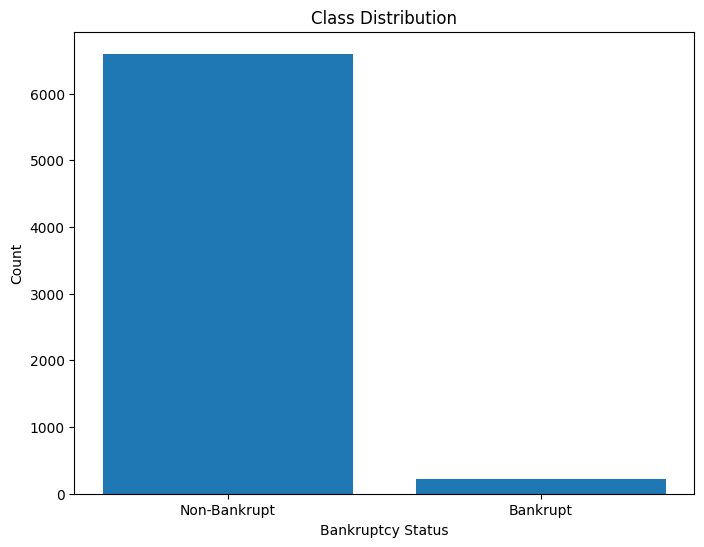

In [10]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
plt.bar(['Non-Bankrupt', 'Bankrupt'], counts)
plt.title('Class Distribution')
plt.xlabel('Bankruptcy Status')
plt.ylabel('Count')
plt.show()

In [11]:
df_temp = pd.DataFrame(data, columns=feature_names)

In [15]:
target_correlations = np.corrcoef(data.T)[0]
sorted_indices = np.argsort(np.abs(target_correlations[1:]))[::-1] + 1
print("\nTop 10 features by correlation with bankruptcy:")
for i in range(10):
    idx = sorted_indices[i]
    print(f"  {feature_names[idx]} (index {idx}): Correlation = {target_correlations[idx]:.4f}")


Top 10 features by correlation with bankruptcy:
  X94 (index 94): Correlation = nan
  X86 (index 86): Correlation = -0.3155
  X2 (index 2): Correlation = -0.2829
  X3 (index 3): Correlation = -0.2731
  X1 (index 1): Correlation = -0.2608
  X38 (index 38): Correlation = -0.2502
  X37 (index 37): Correlation = 0.2502
  X19 (index 19): Correlation = -0.2196
  X68 (index 68): Correlation = -0.2178
  X43 (index 43): Correlation = -0.2079


/Users/TeranGmoravian.edu/NueralWorks/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/TeranGmoravian.edu/NueralWorks/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


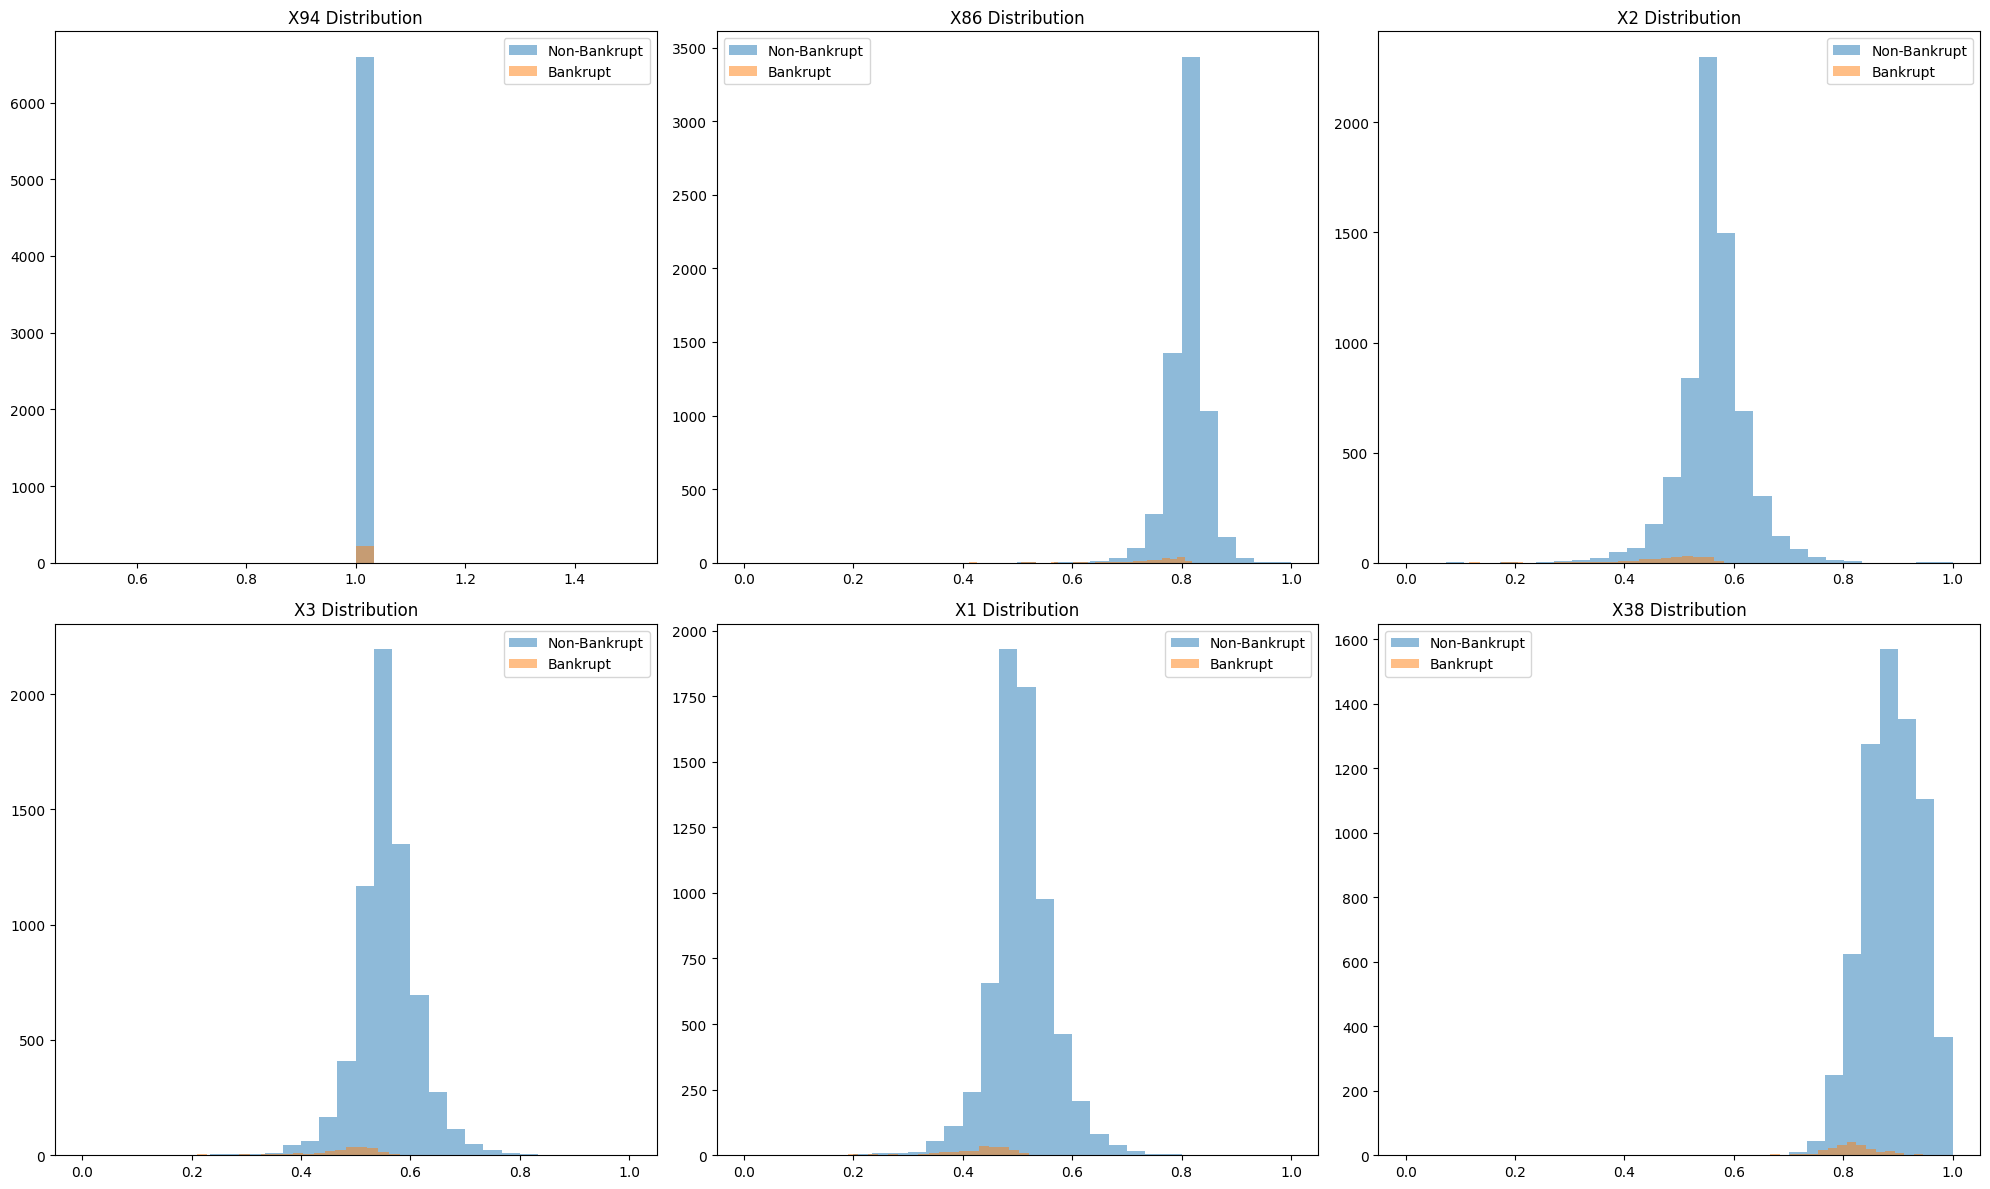

In [16]:
# Visualize distributions of top correlated features
plt.figure(figsize=(20, 12))
for i in range(6):  # Top 6 features
    if i < len(sorted_indices):
        idx = sorted_indices[i]
        plt.subplot(2, 3, i+1)
        
        # Separate data by class
        bankrupt_values = data[data[:, 0] == 1, idx]
        non_bankrupt_values = data[data[:, 0] == 0, idx]
        
        # Plot histograms
        plt.hist(non_bankrupt_values, bins=30, alpha=0.5, label='Non-Bankrupt')
        plt.hist(bankrupt_values, bins=30, alpha=0.5, label='Bankrupt')
        plt.title(f'{feature_names[idx]} Distribution')
        plt.legend()
plt.tight_layout()
plt.show()

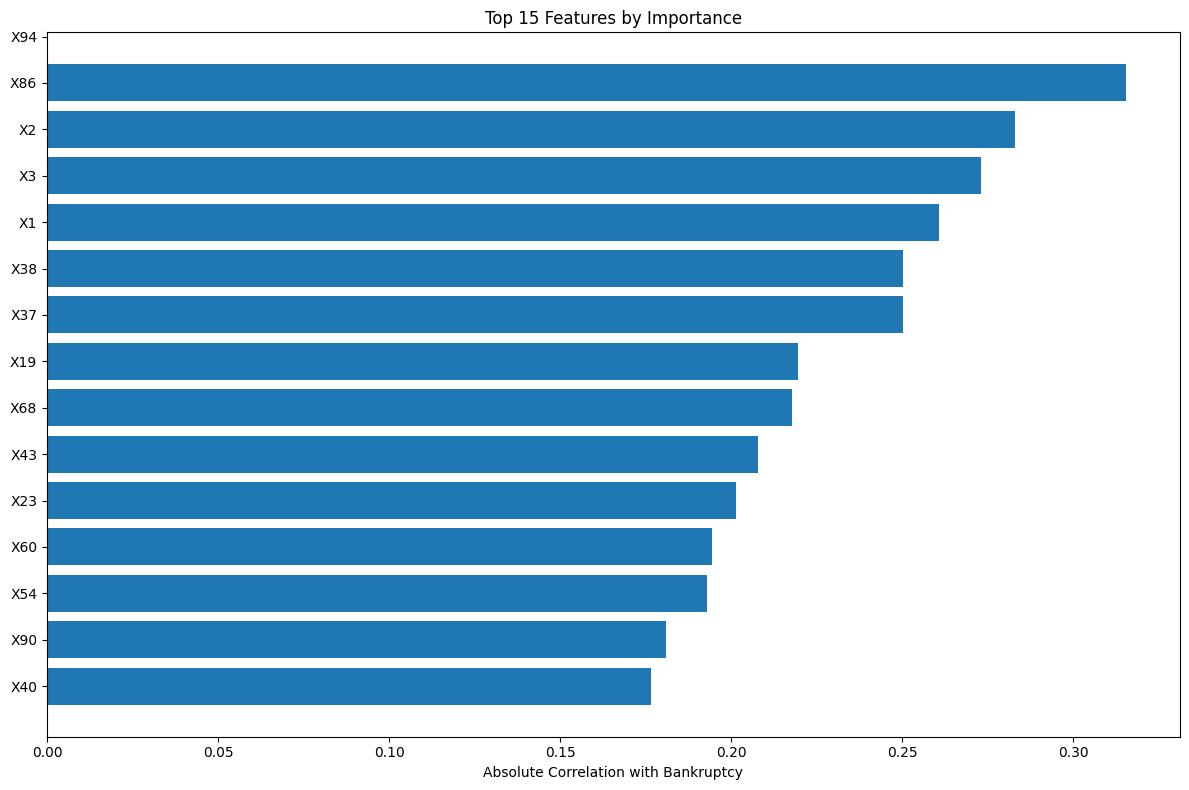

In [17]:
# Feature importance visualization
plt.figure(figsize=(12, 8))
# Get absolute correlations excluding target itself
abs_corr = np.abs(target_correlations[1:])
top_indices = sorted_indices[:15]  # Top 15 features
plt.barh([feature_names[i] for i in top_indices], abs_corr[top_indices-1])
plt.title('Top 15 Features by Importance')
plt.xlabel('Absolute Correlation with Bankruptcy')
plt.gca().invert_yaxis()  # To have highest correlation at the top
plt.tight_layout()
plt.show()

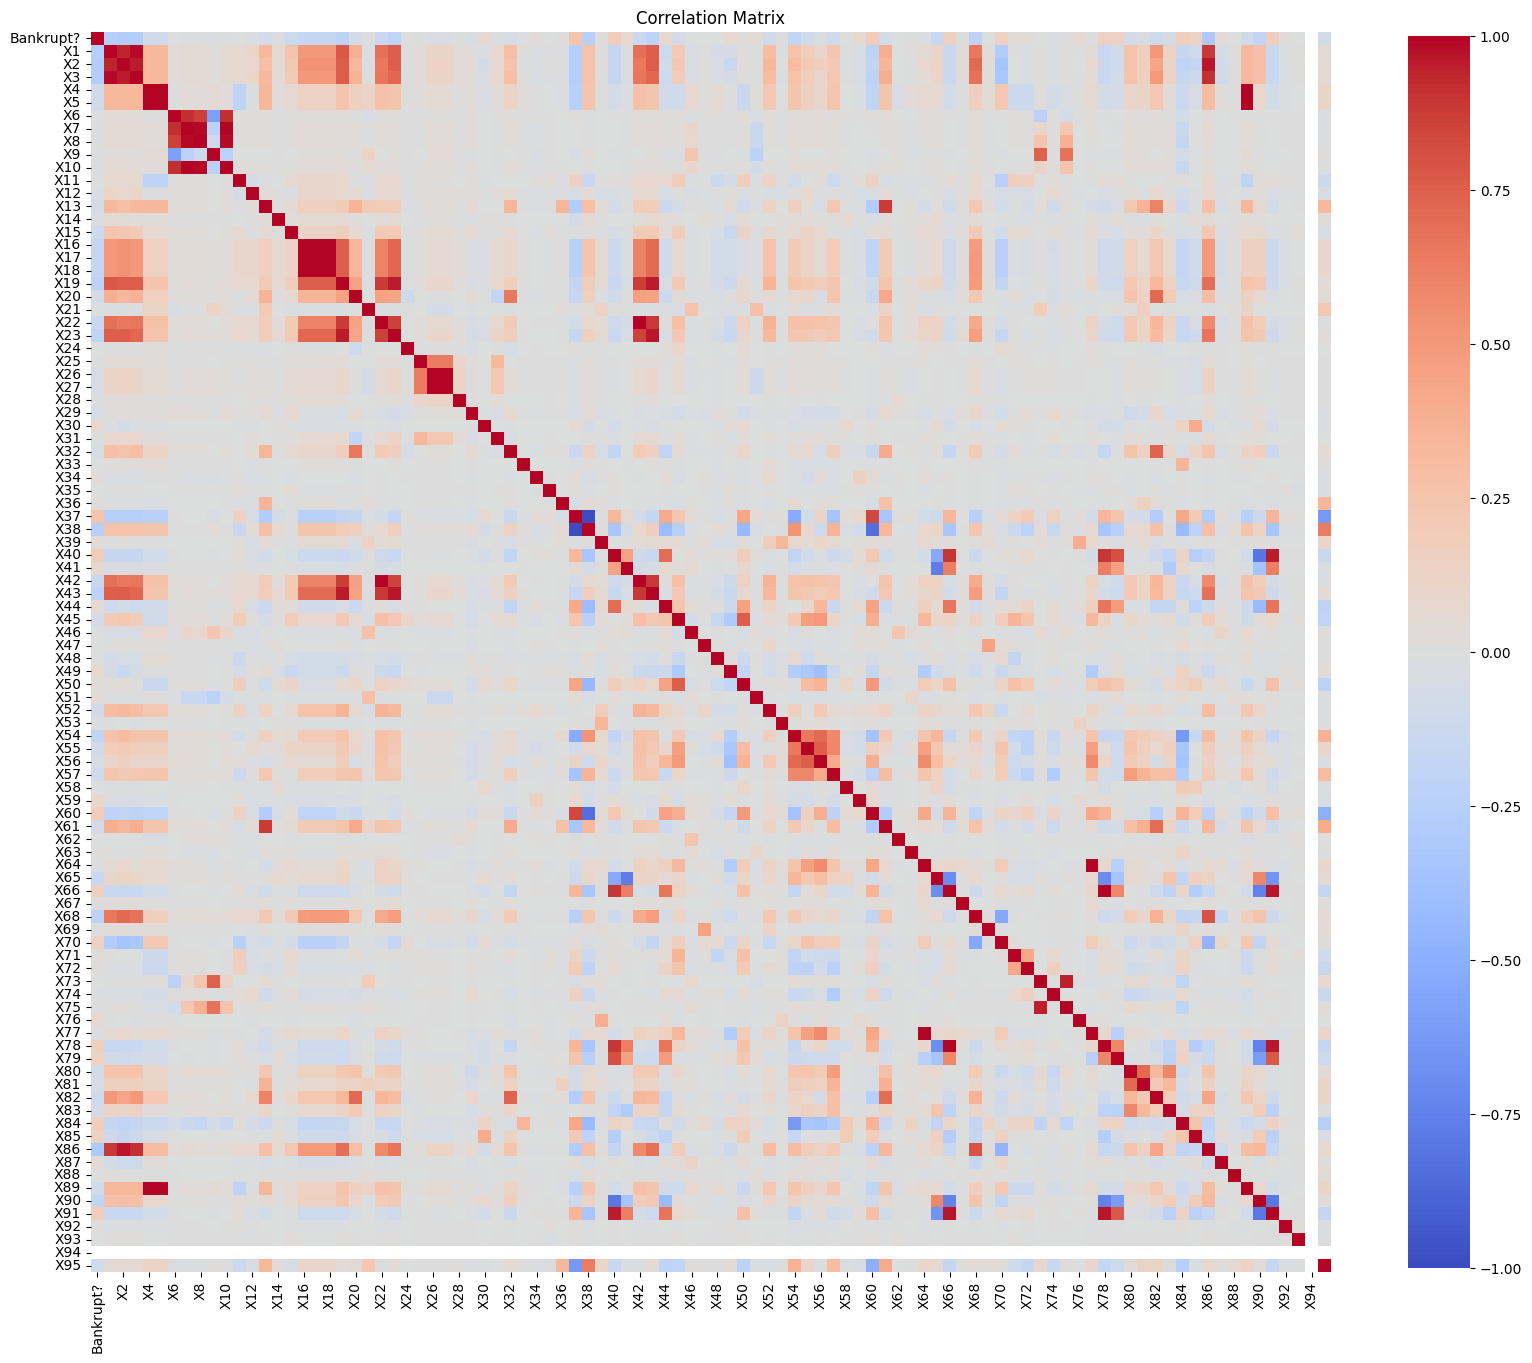

In [18]:
#correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()